## 三角関数ポテンシャルモデル

2通りの生成方法が有るので、両方試す。

### 多項式分布型

全体の確率を定義した上で、それが多項式分布に則ってサンプリングされるモデル

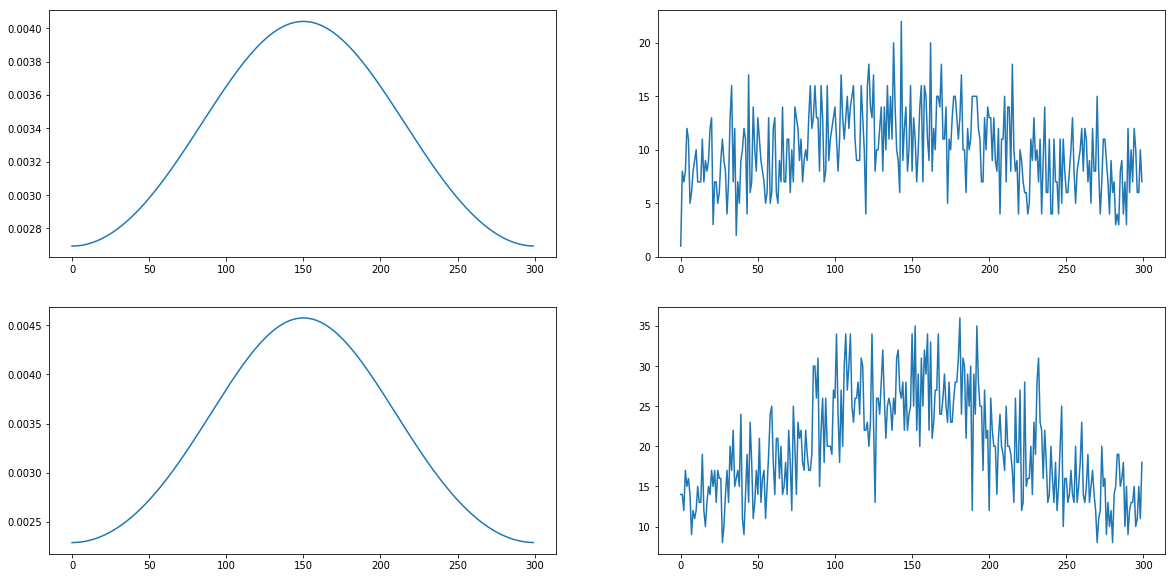

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multinomial
%matplotlib inline

# Determine parameter
# Sample size
S = 2
# Growth rate
PTR = [1.5, 2.0]
PTR = np.array(PTR)
# Converted growth rate for GLM
H = np.log(PTR)
# Length of genome
I = 300
# Location of Ori
Ori = I // 2
# Average coverage depth
aveDepth = [10, 20]
aveDepth = np.array(aveDepth)

x = np.arange(I)
potential = 1 / 2 * (np.cos(2 * np.pi * (x - Ori) / I) + 1.0)
potential = np.ones((I, S)) * H * potential.reshape(I, 1)
potential = np.exp(potential)
potential = potential / potential.sum(axis=0)
potential = potential.T

coverage_m = []
for i in range(S):
    p = potential[i]
    coverage_m.append(multinomial.rvs(n=aveDepth[i] * I, p=p, size=1)[0])

for i in range(S):
    df = pd.DataFrame({"genome_name": ["genome_name"] * I, "position": x+1, "coverage": coverage_m[i]})
    df = df[["genome_name", "position", "coverage"]]
    df.to_csv("input_tri_{0}.tsv".format(i+1), sep="\t", header=None, index=None)

fig = plt.figure(figsize=(20,10))
for i in range(S):
    ax = fig.add_subplot(S, 2, 2*i+1)
    ax.plot(x, potential[i])
    ax = fig.add_subplot(S, 2, 2*i+2)
    ax.plot(x, coverage_m[i])

### ポアソン分布型

全体のポテンシャル量を線形関数で求めた後に、ポアソン分布に従ってポテンシャルpからリード数が決定するモデル。ポアソン分布のパラメータは、ゲノム長を$I$、平均深度を$\bar{D}$とした時に、地点$i$において

$\mu_i = \frac{p_i}{\Sigma_{i=1}^Ip}I\bar{D}$

で求めた。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
%matplotlib inline

# Determine parameter
S = 6
PTR = [1.5, 2.0]
PTR = np.array(PTR)
H = np.log(PTR)
I = 300
Ori = I // 2
aveDepth = [10, 20]
aveDepth = np.array(aveDepth)

x = np.arange(I)
potential = 1 / 2 * (np.cos(2 * np.pi * (x - Ori) / I) + 1.0)
potential = np.ones((I, S)) * H * potential.reshape(I, 1)
potential = np.exp(potential)
potential = potential.T

coverage_p = []
for i in range(S):
    p = potential[i]
    a = aveDepth[i]
    coverage_p.append(poisson.rvs(mu= p * I * a / p.sum(), loc=0))

for i in range(S):
    df = pd.DataFrame({"genome_name": ["genome_name"] * I, "position": x+1, "coverage": coverage_p[i]})
    df = df[["genome_name", "position", "coverage"]]
    df.to_csv("input_tri_{0}_Ori{1}.tsv".format(i+1, Ori), sep="\t", header=None, index=None)

fig = plt.figure(figsize=(20,10))
for i in range(6):
    ax = fig.add_subplot(6, 2, 2*i+1)
    ax.plot(x, potential[i])
    ax = fig.add_subplot(6, 2, 2*i+2)
    ax.plot(x, coverage_p[i])

# 多項式分布型とポアソン分布型で比較
fig = plt.figure(figsize=(20,10))
for i in range(6):
    ax = fig.add_subplot(6, 2, 2*i+1)
    ax.plot(x, coverage_m[i])
    ax = fig.add_subplot(6, 2, 2*i+2)
    ax.plot(x, coverage_p[i])    

## 線形関数ポテンシャルモデル

### 多項式分布型

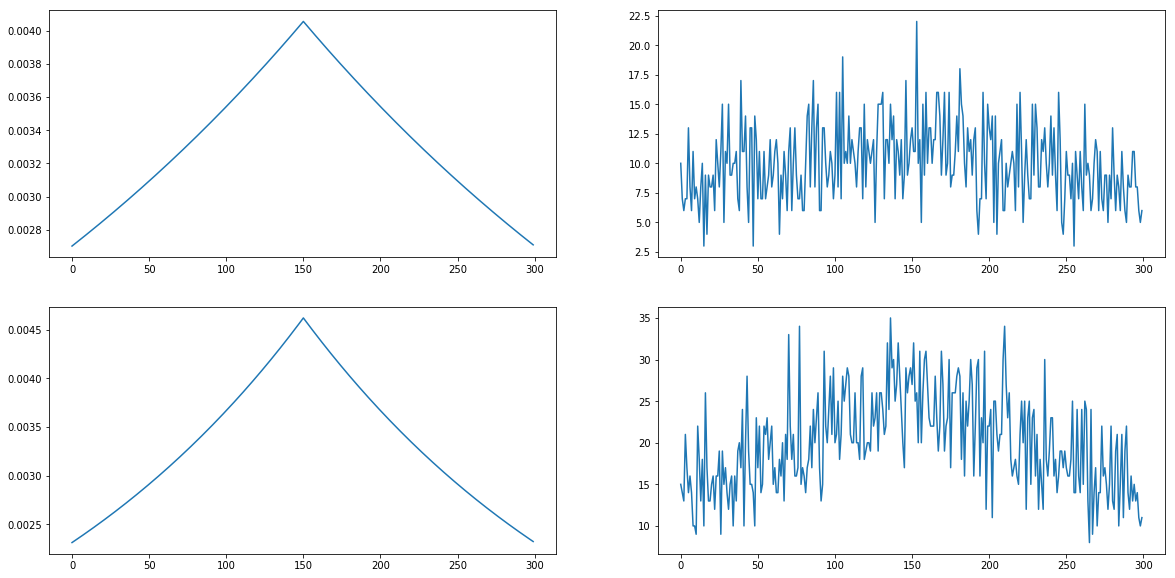

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multinomial
%matplotlib inline

S = 2
PTR = [1.5, 2.0]
PTR = np.array(PTR)
H = np.log(PTR)
I = 300
Ori = I // 2
aveDepth = [10, 20]
aveDepth = np.array(aveDepth)

x = np.arange(I)
potential = 2 / I * np.abs(np.abs(x - Ori) - I / 2)
potential = np.ones((I, S)) * H * potential.reshape(I, 1)
potential = np.exp(potential)
potential = potential / potential.sum(axis=0)
potential = potential.T

coverage = []
for i in range(S):
    p = potential[i]
    coverage.append(multinomial.rvs(n=aveDepth[i] * I, p=p, size=1)[0])

for i in range(S):
    df = pd.DataFrame({"genome_name": ["genome_name"] * I, "position": x+1, "coverage": coverage[i]})
    df = df[["genome_name", "position", "coverage"]]
    #df.to_csv("input_lin_{0}.tsv".format(i+1), sep="\t", header=None, index=None)

fig = plt.figure(figsize=(20,10))
for i in range(S):
    ax = fig.add_subplot(S, 2, 2*i+1)
    ax.plot(x, potential[i])
    ax = fig.add_subplot(S, 2, 2*i+2)
    ax.plot(x, coverage[i])

## von mises分布ポテンシャルモデル

The probability density function of von mises distribition is

$f(x, \kappa) = \frac{\exp{(\kappa \cos{(x)})}}{2 \pi I_0(\kappa)}$

if x is $\frac{\pi}{2}$, this function become minimum

$f(0, \kappa) = \frac{1}{2 \pi I_0(\kappa)}$

and if x is zero, this function takes maximum

$f(0, \kappa) = \frac{\exp{(\kappa)}}{2 \pi I_0(\kappa)}$

The ratio of maximum to minimum is

$PTR = \frac{\frac{\exp{(\kappa)}}{2 \pi I_0(\kappa)}}{\frac{1}{2 \pi I_0(\kappa)}} = \exp{(\kappa)}$

### 多項式分布型

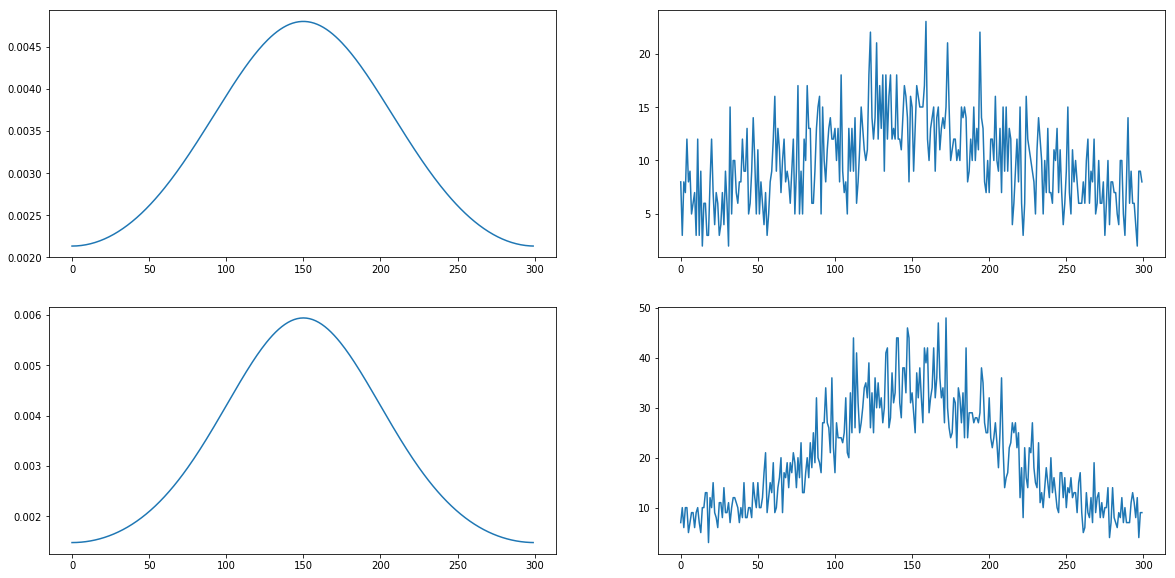

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multinomial, vonmises
%matplotlib inline

S = 2

PTR = [1.5, 2.0]
kappa = np.log(PTR)
I = 300
Ori = I // 2
aveDepth = [10, 20]
aveDepth = np.array(aveDepth)

x = np.arange(I)
potential = [vonmises.pdf(x, k, loc=Ori, scale=I/(2*np.pi)) for k in kappa]
potential = np.array(potential)

coverage = []
for i in range(S):
    p = potential[i]
    coverage.append(multinomial.rvs(n=aveDepth[i] * I, p=p, size=1)[0])

for i in range(S):
    df = pd.DataFrame({"genome_name": ["genome_name"] * I, "position": x+1, "coverage": coverage[i]})
    df = df[["genome_name", "position", "coverage"]]
    #df.to_csv("input_vm_{0}.tsv".format(i+1), sep="\t", header=None, index=None)

fig = plt.figure(figsize=(20, 10))
for i in range(S):
    ax = fig.add_subplot(S, 2, 2*i+1)
    ax.plot(x, potential[i])
    ax = fig.add_subplot(S, 2, 2*i+2)
    ax.plot(x, coverage[i])

In [1]:
import pystan
import pandas as pd
import numpy as np

def load_depth_file(depth_file_path: str):
    df = pd.read_csv(depth_file_path,
                     sep="\t",
                     names=["genome", "location", "depth"])
    if df["genome"].unique().size != 1:
        raise ValueError("File contains multiple mapping result")
    x = np.arange(1, len(df)+1, 1)
    f_df = pd.DataFrame(x, columns=["location"])
    j_df = df.merge(f_df, on=["location"], how="outer")
    genome_name = df["genome"].unique()[0]
    j_df["depth"] = j_df["depth"].fillna(0)
    j_df["genome"] = genome_name
    return j_df


def load_multiple_depth_file(depth_file_path: list):
    list_ = []
    for i, f in enumerate(depth_file_path):
        df = load_depth_file(f)
        df["subject"] = i+1
        df = df[["subject", "location", "depth"]]
        list_.append(df)
    c_df = pd.concat(list_)
    return c_df



In [2]:
path = ["input_vm_1.tsv", "input_vm_2.tsv"]
df = load_multiple_depth_file(path)

In [3]:
model_code = """
    data {
        int I ;
        int S ;
        int L ;
        int<lower=1, upper=L> LOCATION[I] ;
        int<lower=1, upper=S> SUBJECT[I] ;
        int<lower=0> DEPTH[I] ;
    }

    transformed data {
        real RADIAN[I] ;
        for (i in 1:I){
            RADIAN[i] = 2.0 * pi() * LOCATION[i] / L ;
        }
    }

    parameters {
        unit_vector[2] O ;
        real<lower=0> kappa[S] ;
        real<lower=0> sigma_kappa ;
    }

    transformed parameters{
        real<lower=-pi(), upper=pi()> ori ;

        // convert unit vector
        ori = atan2(O[1], O[2]) ;
    }

    model {
        for(s in 1:S){
            kappa[s] ~ normal(0, sigma_kappa) ;
        }
        for(i in 1:I){
            target += DEPTH[i] * von_mises_lpdf(RADIAN[i] | ori, kappa[SUBJECT[i]]) ;
        }
    }

    generated quantities {
        real<lower=1.0> PTR[S] ;
        real MRL[S] ;
        real CV[S] ;
        real CSD[S] ;
        vector[I] log_lik ;

        for(s in 1:S){
            PTR[s] = exp(kappa[s]) ;
            MRL[s] = modified_bessel_first_kind(1, kappa[s]) / modified_bessel_first_kind(0, kappa[s]) ;
            CV[s] = 1 - MRL[s] ;
            CSD[s] = sqrt(-2 * log(MRL[s])) ;
        }
        for(i in 1:I){
            log_lik[i] = DEPTH[i] * von_mises_lpdf(RADIAN[i] | ori, kappa[SUBJECT[i]]) ;
        }
    }
"""

model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1355fe1b1cd44007fc441ea5db6923b7 NOW.


In [ ]:
from time import sleep

stan_data = {
    "I": len(df),
    "S": len(path),
    "L": df["location"].max(),
    "SUBJECT": df["subject"].values,
    "LOCATION": df["location"].values,
    "DEPTH": df["depth"].values
}
for i in np.logspace(-10,-4,num=7):
    result = []
    print(i)
    for j in range(10):
        v = model.optimizing(data=stan_data, tol_param=i)["PTR"]
        result.append(v)
        sleep(0.5)
    result = np.array(result)
    print(result.mean(axis=0))

1e-10


In [ ]:
import 